In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [2]:
##filename = 'Mearure-planarity-PCB-WURTH-Thin.txt'
filename = 'Mearure-planarity-TOPlayer-sparePCB-Rohacel-original.txt'
with open(filename, 'r', encoding='ISO-8859-1') as file:
    lines = file.readlines()

for line in lines: print(line.strip())



Elément            Réel       Val. nom.           Ecart       Tol. sup.       Tol. inf.           OK/HT
(Dév PR)        (Tol PR)
O(De 1 pt)
Coord. X =            6,108
Coord. Y =           -0,189
Coord. Z =           10,780

P[1,1](De 1 pt)
Coord. X =            0,000
Coord. Y =           -0,002
Coord. Z =            0,000

P[1,2](De 1 pt)
Coord. X =           -0,002
Coord. Y =           24,996
Coord. Z =            0,018

P[1,3](De 1 pt)
Coord. X =           -0,002
Coord. Y =           49,996
Coord. Z =           -0,002

P[1,4](De 1 pt)
Coord. X =           -0,002
Coord. Y =           74,996
Coord. Z =           -0,013

P[1,5](De 1 pt)
Coord. X =           -0,002
Coord. Y =           99,996
Coord. Z =           -0,029

P[1,6](De 1 pt)
Coord. X =           -0,002
Coord. Y =          124,996
Coord. Z =           -0,031

P[1,7](De 1 pt)
Coord. X =           -0,002
Coord. Y =          149,996
Coord. Z =           -0,028

P[1,8](De 1 pt)
Coord. X =           -0,002
Coord. Y =          174

In [3]:
# Skip the first 3 lines (header)
for line in lines[3:-8]:
    print(line.strip())

O(De 1 pt)
Coord. X =            6,108
Coord. Y =           -0,189
Coord. Z =           10,780

P[1,1](De 1 pt)
Coord. X =            0,000
Coord. Y =           -0,002
Coord. Z =            0,000

P[1,2](De 1 pt)
Coord. X =           -0,002
Coord. Y =           24,996
Coord. Z =            0,018

P[1,3](De 1 pt)
Coord. X =           -0,002
Coord. Y =           49,996
Coord. Z =           -0,002

P[1,4](De 1 pt)
Coord. X =           -0,002
Coord. Y =           74,996
Coord. Z =           -0,013

P[1,5](De 1 pt)
Coord. X =           -0,002
Coord. Y =           99,996
Coord. Z =           -0,029

P[1,6](De 1 pt)
Coord. X =           -0,002
Coord. Y =          124,996
Coord. Z =           -0,031

P[1,7](De 1 pt)
Coord. X =           -0,002
Coord. Y =          149,996
Coord. Z =           -0,028

P[1,8](De 1 pt)
Coord. X =           -0,002
Coord. Y =          174,996
Coord. Z =           -0,034

P[1,9](De 1 pt)
Coord. X =           -0,002
Coord. Y =          199,996
Coord. Z =           -0,

In [4]:
point_ids = []
for line in lines:
    match = re.search(r'\[([\d,]+)\]', line)
    if match:
        point_id = match.group(1)
        point_ids.append(point_id)

# Print the extracted point IDs
for point_id in point_ids:
    print(point_id)

1,1
1,2
1,3
1,4
1,5
1,6
1,7
1,8
1,9
2,1
2,2
2,3
2,4
2,5
2,6
2,7
2,8
2,9
3,1
3,2
3,3
3,4
3,5
3,6
3,7
3,8
3,9
4,1
4,2
4,3
4,4
4,5
4,6
4,7
4,8
4,9
5,1
5,2
5,3
5,4
5,5
5,6
5,7
5,8
5,9
6,1
6,2
6,3
6,4
6,5
6,6
6,7
6,8
6,9
7,1
7,2
7,3
7,4
7,5
7,6
7,7
7,8
7,9
8,1
8,2
8,3
8,4
8,5
8,6
8,7
8,8
8,9
9,1
9,2
9,3
9,4
9,5
9,6
9,7
9,8
9,9
10,1
10,2
10,3
10,4
10,5
10,6
10,7
10,8
10,9
11,1
11,2
11,3
11,4
11,5
11,6
11,7
11,8
11,9
12,1
12,2
12,3
12,4
12,5
12,6
12,7
12,8
12,9


In [5]:
# Initialize variables to store point IDs and corresponding coordinates
point_data = []

# Regular expressions to match point ID and coordinate lines
point_id_pattern = r'\[([\d,]+)\]'
coord_pattern = r'Coord\. ([XYZ]) =\s*([-+]?\d+,\d+)'

# Extract point IDs and coordinates from lines
current_point_id = None
current_coords = {}

for line in lines:
    # Check if the line contains a point ID
    match_id = re.search(point_id_pattern, line)
    if match_id:
        current_point_id = match_id.group(1)
        current_coords = {}
        continue

    # Check if the line contains a coordinate
    match_coord = re.search(coord_pattern, line)
    if match_coord and current_point_id:
        coord_type = match_coord.group(1)
        coord_value = float(match_coord.group(2).replace(',', '.'))
        current_coords[coord_type] = coord_value

        # If all coordinates are found, add them to the point data
        if len(current_coords) == 3:
            point_data.append((current_point_id, current_coords))
            current_point_id = None

# Print the extracted point data
for point_id, coords in point_data:
    print("Point ID:", point_id)
    print("Coordinates:", coords)

Point ID: 1,1
Coordinates: {'X': 0.0, 'Y': -0.002, 'Z': 0.0}
Point ID: 1,2
Coordinates: {'X': -0.002, 'Y': 24.996, 'Z': 0.018}
Point ID: 1,3
Coordinates: {'X': -0.002, 'Y': 49.996, 'Z': -0.002}
Point ID: 1,4
Coordinates: {'X': -0.002, 'Y': 74.996, 'Z': -0.013}
Point ID: 1,5
Coordinates: {'X': -0.002, 'Y': 99.996, 'Z': -0.029}
Point ID: 1,6
Coordinates: {'X': -0.002, 'Y': 124.996, 'Z': -0.031}
Point ID: 1,7
Coordinates: {'X': -0.002, 'Y': 149.996, 'Z': -0.028}
Point ID: 1,8
Coordinates: {'X': -0.002, 'Y': 174.996, 'Z': -0.034}
Point ID: 1,9
Coordinates: {'X': -0.002, 'Y': 199.996, 'Z': -0.045}
Point ID: 2,1
Coordinates: {'X': 24.998, 'Y': -0.002, 'Z': -0.003}
Point ID: 2,2
Coordinates: {'X': 24.998, 'Y': 24.996, 'Z': 0.011}
Point ID: 2,3
Coordinates: {'X': 24.998, 'Y': 49.996, 'Z': -0.004}
Point ID: 2,4
Coordinates: {'X': 24.998, 'Y': 74.996, 'Z': -0.039}
Point ID: 2,5
Coordinates: {'X': 24.998, 'Y': 99.996, 'Z': -0.028}
Point ID: 2,6
Coordinates: {'X': 24.998, 'Y': 124.996, 'Z': -0.023

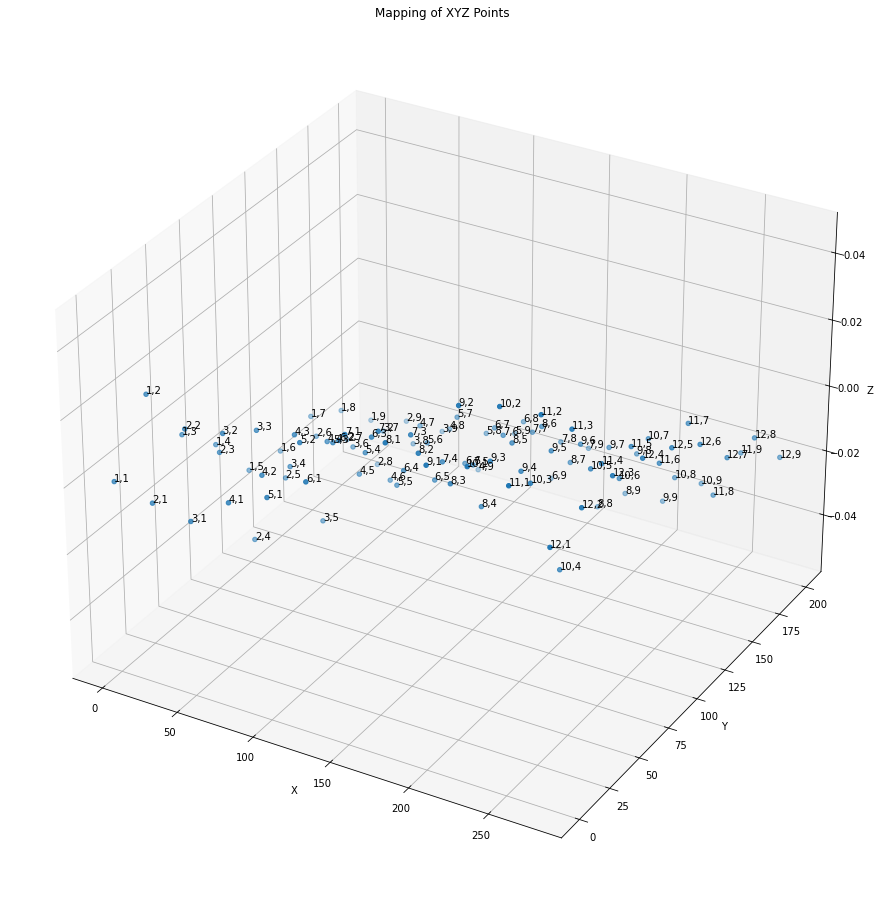

In [6]:
# Extract X, Y, Z values and corresponding point IDs
point_ids = []
x_values = []
y_values = []
z_values = []

for point_id, coords in point_data:
    point_ids.append(point_id)
    x_values.append(coords['X'])
    y_values.append(coords['Y'])
    z_values.append(coords['Z'])

# Plot the XYZ points relative to their point IDs
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_values, y_values, z_values)

# Label each point with its corresponding ID
for i, point_id in enumerate(point_ids):
    ax.text(x_values[i], y_values[i], z_values[i], point_id)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Mapping of XYZ Points')

plt.show()


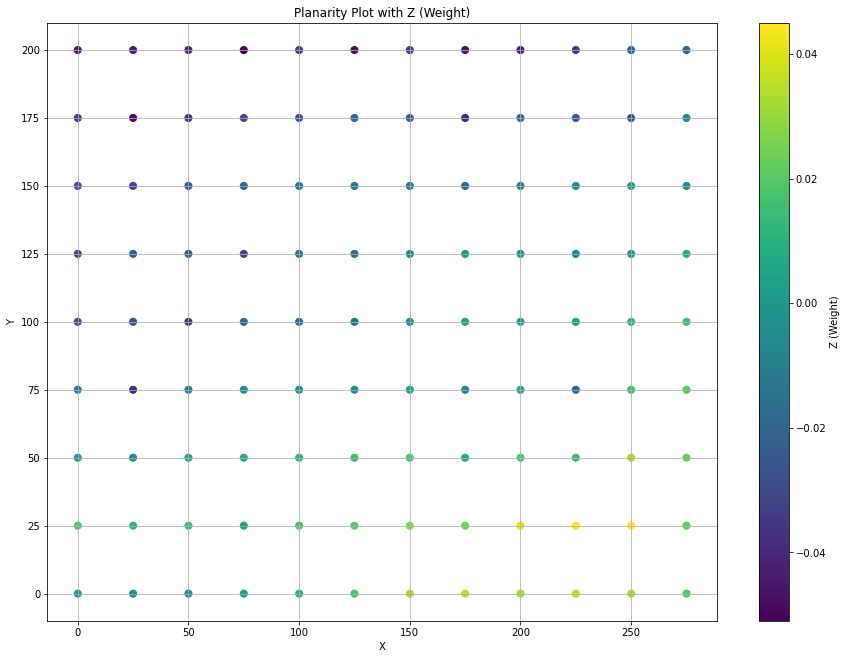

In [7]:
plt.figure(figsize=(15, 11))
plt.scatter(x_values, y_values, c=z_values, cmap='viridis', s=50)
plt.colorbar(label='Z (Weight)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Planarity Plot with Z (Weight)')
plt.grid(True)
plt.show()

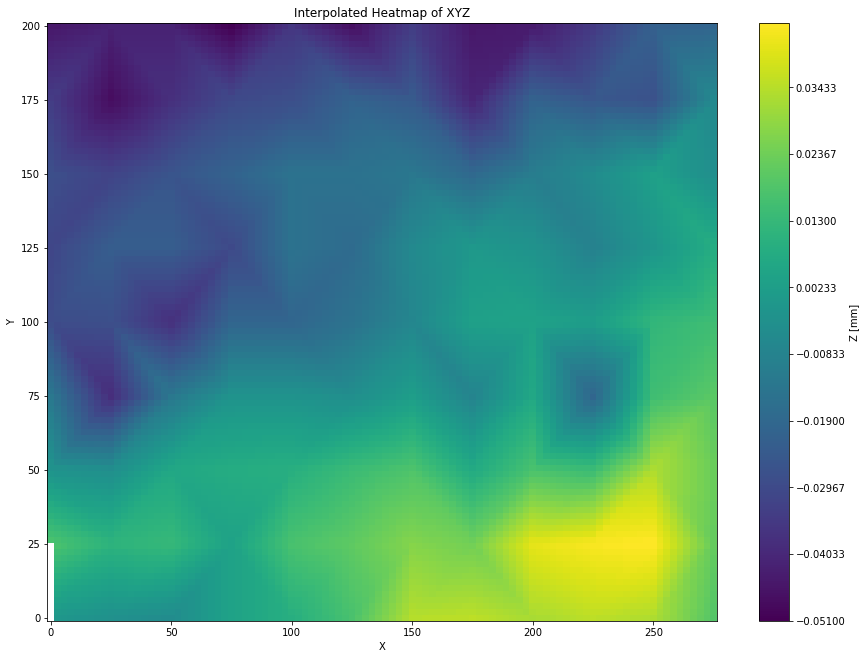

In [8]:
# Create a regular grid to interpolate onto
x_grid = np.linspace(min(x_values), max(x_values), 100)
y_grid = np.linspace(min(y_values), max(y_values), 100)
X, Y = np.meshgrid(x_grid, y_grid)

# Interpolate Z values onto the grid
Z = griddata((x_values, y_values), z_values, (X, Y), method='linear')
Z_grid = np.linspace(min(z_values), max(z_values), 100)
#colorbar = plt.colorbar(heatmap, label='Z [mm]', ticks=np.linspace(Z_grid.min(), Z_grid.max(), num=10))

# Plot the heatmap
plt.figure(figsize=(15, 11))
plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(label='Z [mm]', ticks=np.linspace(Z_grid.min(), Z_grid.max(), num=10))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Interpolated Heatmap of XYZ')
plt.show()

In [9]:
# Flatten the interpolated Z values
Z_flat = Z.flatten()

# Calculate the Root Mean Square (RMS)
rms = np.sqrt(np.mean(Z_flat**2))

print("Root Mean Square (RMS) of the heatmap:", rms)

Root Mean Square (RMS) of the heatmap: nan


In [10]:
print(Z_flat)

[        nan -0.00033312 -0.00066648 ... -0.02044444 -0.02022222
 -0.02      ]


In [11]:
# Calculate the Root Mean Square (RMS) excluding NaN values
rms = np.sqrt(np.nanmean(Z_flat**2))

print("Root Mean Square (RMS) of the heatmap (excluding NaN points):", rms)

Root Mean Square (RMS) of the heatmap (excluding NaN points): 0.022236829159478538


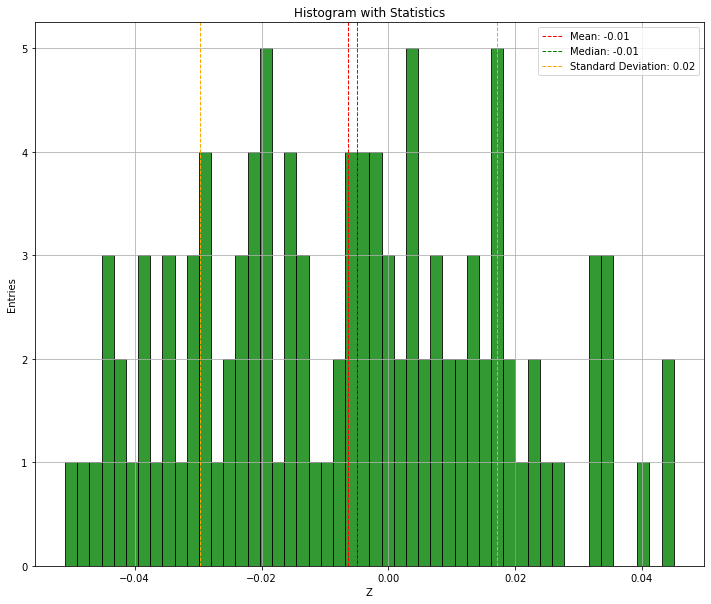

In [12]:
# Create the histogram
plt.figure(figsize=(12, 10))

plt.hist(z_values, bins=50, color='green', edgecolor='black', alpha=0.8)
# Add mean, median, and standard deviation lines
mean_value = np.mean(z_values)
median_value = np.median(z_values)
std_dev = np.std(z_values)

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mean_value + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Standard Deviation: {std_dev:.2f}')
plt.axvline(mean_value - std_dev, color='orange', linestyle='dashed', linewidth=1)

plt.legend()
plt.xlabel('Z')
plt.ylabel('Entries')
plt.title('Histogram of Z Values')
plt.title('Histogram with Statistics')
plt.grid(True)
plt.show()

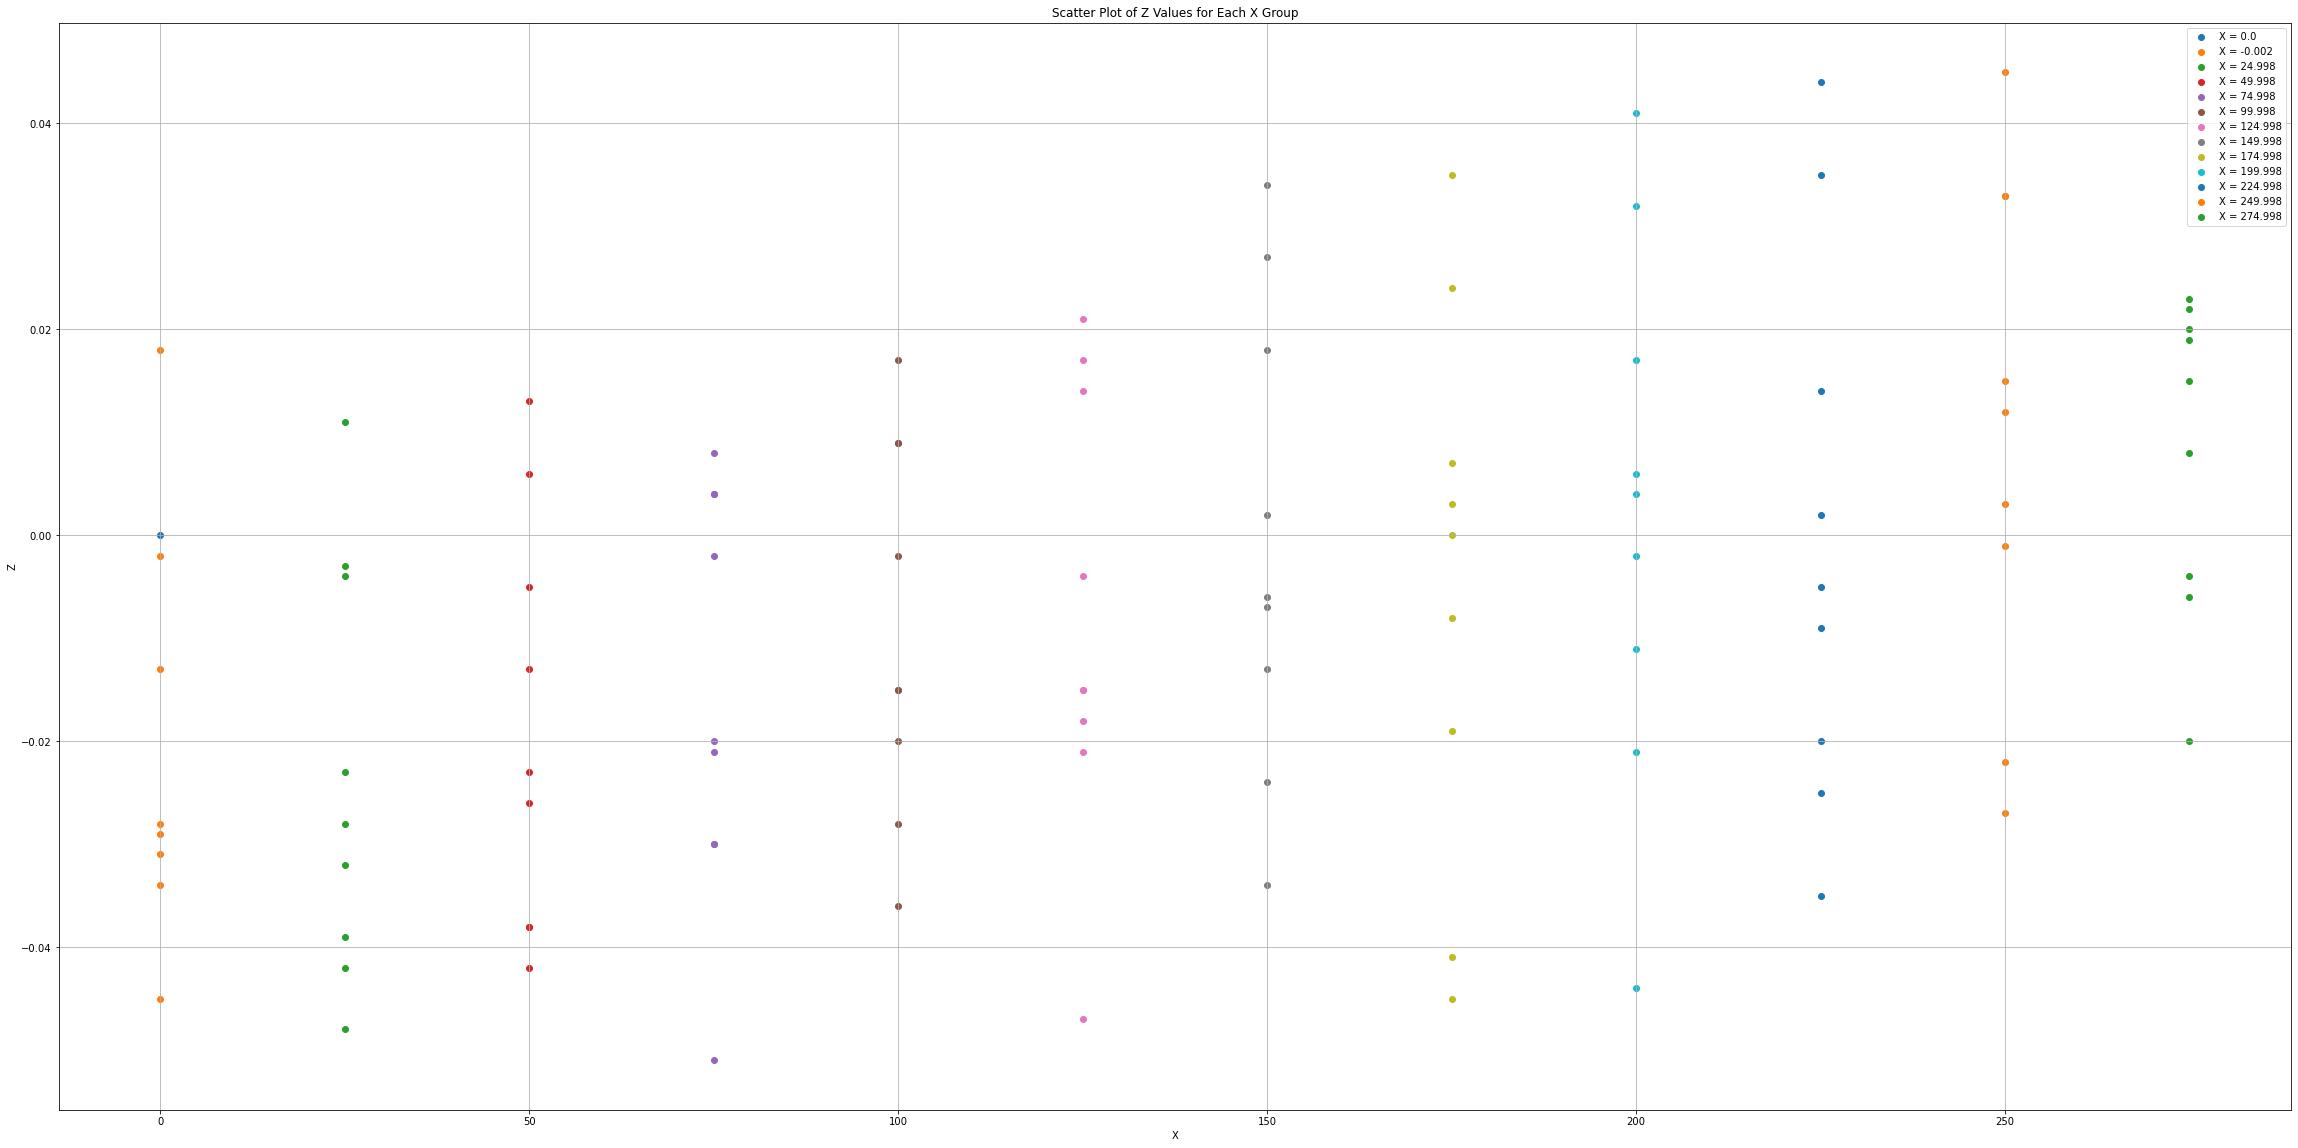

In [13]:
# Group Z values by X values
x_groups = {}
for x, z in zip(x_values, z_values):
    if x not in x_groups:
        x_groups[x] = []
    x_groups[x].append(z)

# Plot scatter plots for each X group
plt.figure(figsize=(40, 20))
for x, z_group in x_groups.items():
    plt.scatter([x] * len(z_group), z_group, label=f"X = {x}")

plt.xlabel('X')
plt.ylabel('Z')
plt.title('Scatter Plot of Z Values for Each X Group')
plt.legend()
plt.grid(True)
plt.show()

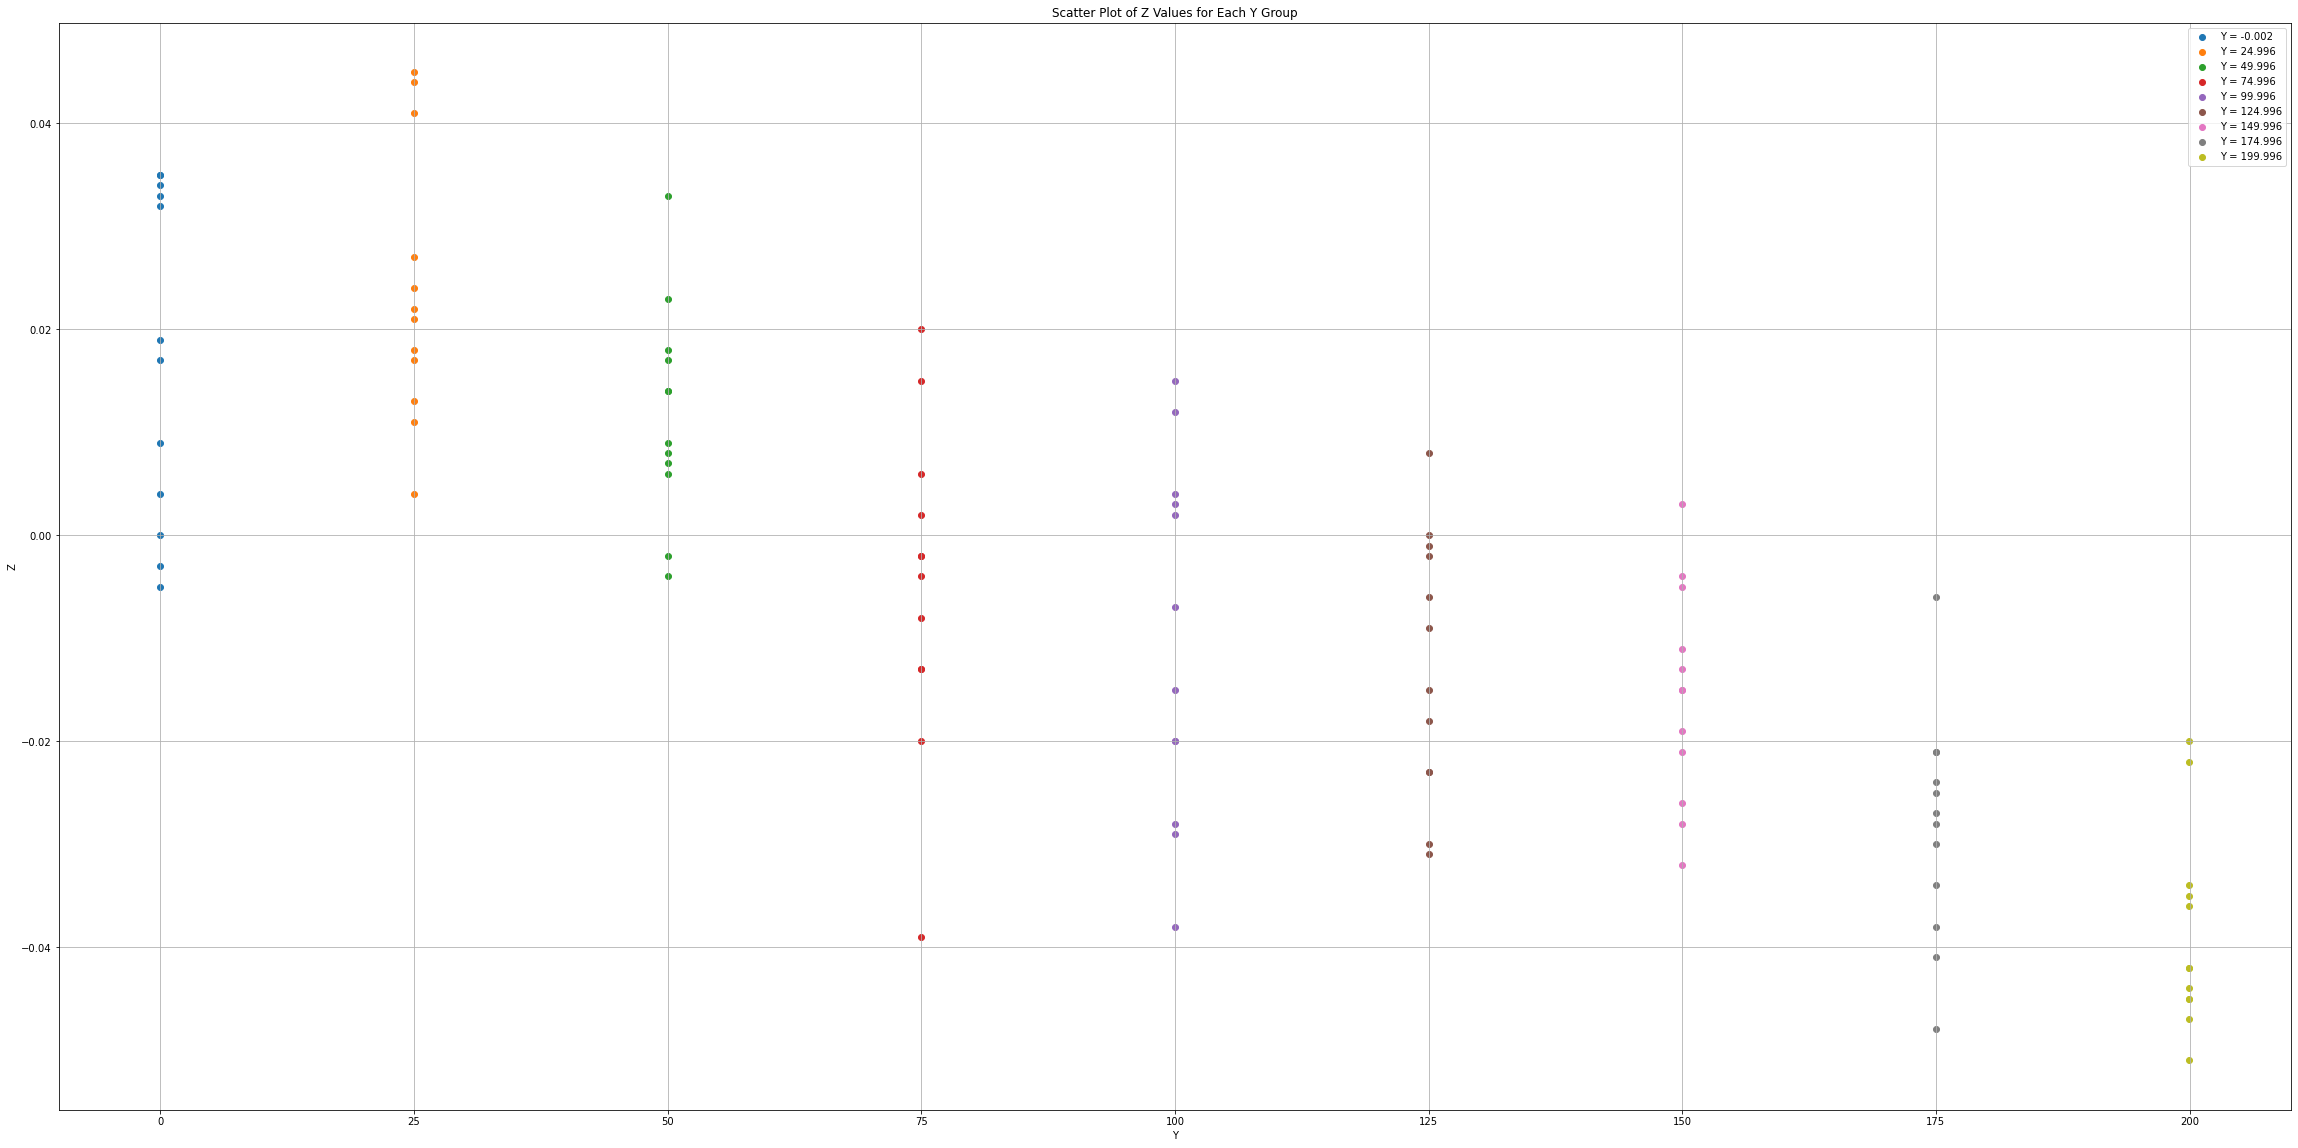

In [14]:
# Group Z values by Y values
y_groups = {}
for y, z in zip(y_values, z_values):
    if y not in y_groups:
        y_groups[y] = []
    y_groups[y].append(z)

# Plot scatter plots for each X group
plt.figure(figsize=(40, 20))
for y, z_group in y_groups.items():
    indices = range(1, len(z_values) + 1)
    #plt.scatter(indices, z_values, label=f'Y = {y}')

    plt.scatter([y] * len(z_group), z_group, label=f"Y = {y}")

plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Scatter Plot of Z Values for Each Y Group')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Initialize variables to store point IDs and corresponding coordinates
point_data = []

# Regular expressions to match point ID and coordinate lines
point_id_pattern = r'\[([\d,]+)\]'
coord_pattern = r'Coord\. ([XYZ]) =\s*([-+]?\d+,\d+)'

# Extract point IDs and coordinates from lines
current_point_id = None
current_coords = {}

for line in lines:
    # Check if the line contains a point ID
    match_id = re.search(point_id_pattern, line)
    if match_id:
        current_point_id = match_id.group(1)
        current_coords = {}
        continue

    # Check if the line contains a coordinate
    match_coord = re.search(coord_pattern, line)
    if match_coord and current_point_id:
        coord_type = match_coord.group(1)
        coord_value = float(match_coord.group(2).replace(',', '.'))
        current_coords[coord_type] = coord_value

        # If all coordinates are found, add them to the point data
        if len(current_coords) == 3:
            point_data.append((current_point_id, current_coords))
            current_point_id = None

# Convert the data to the desired format
formatted_data = []
for point_id, coords in point_data:
    formatted_coords = {'X': coords['X'], 'Y': coords['Y'], 'Z': coords['Z']}
    formatted_data.append((point_id, formatted_coords))

# Print the formatted data
for point_id, coords in formatted_data:
    print("Point ID:", point_id)
    print("Coordinates:", coords)


Point ID: 1,1
Coordinates: {'X': 0.0, 'Y': -0.002, 'Z': 0.0}
Point ID: 1,2
Coordinates: {'X': -0.002, 'Y': 24.996, 'Z': 0.018}
Point ID: 1,3
Coordinates: {'X': -0.002, 'Y': 49.996, 'Z': -0.002}
Point ID: 1,4
Coordinates: {'X': -0.002, 'Y': 74.996, 'Z': -0.013}
Point ID: 1,5
Coordinates: {'X': -0.002, 'Y': 99.996, 'Z': -0.029}
Point ID: 1,6
Coordinates: {'X': -0.002, 'Y': 124.996, 'Z': -0.031}
Point ID: 1,7
Coordinates: {'X': -0.002, 'Y': 149.996, 'Z': -0.028}
Point ID: 1,8
Coordinates: {'X': -0.002, 'Y': 174.996, 'Z': -0.034}
Point ID: 1,9
Coordinates: {'X': -0.002, 'Y': 199.996, 'Z': -0.045}
Point ID: 2,1
Coordinates: {'X': 24.998, 'Y': -0.002, 'Z': -0.003}
Point ID: 2,2
Coordinates: {'X': 24.998, 'Y': 24.996, 'Z': 0.011}
Point ID: 2,3
Coordinates: {'X': 24.998, 'Y': 49.996, 'Z': -0.004}
Point ID: 2,4
Coordinates: {'X': 24.998, 'Y': 74.996, 'Z': -0.039}
Point ID: 2,5
Coordinates: {'X': 24.998, 'Y': 99.996, 'Z': -0.028}
Point ID: 2,6
Coordinates: {'X': 24.998, 'Y': 124.996, 'Z': -0.023

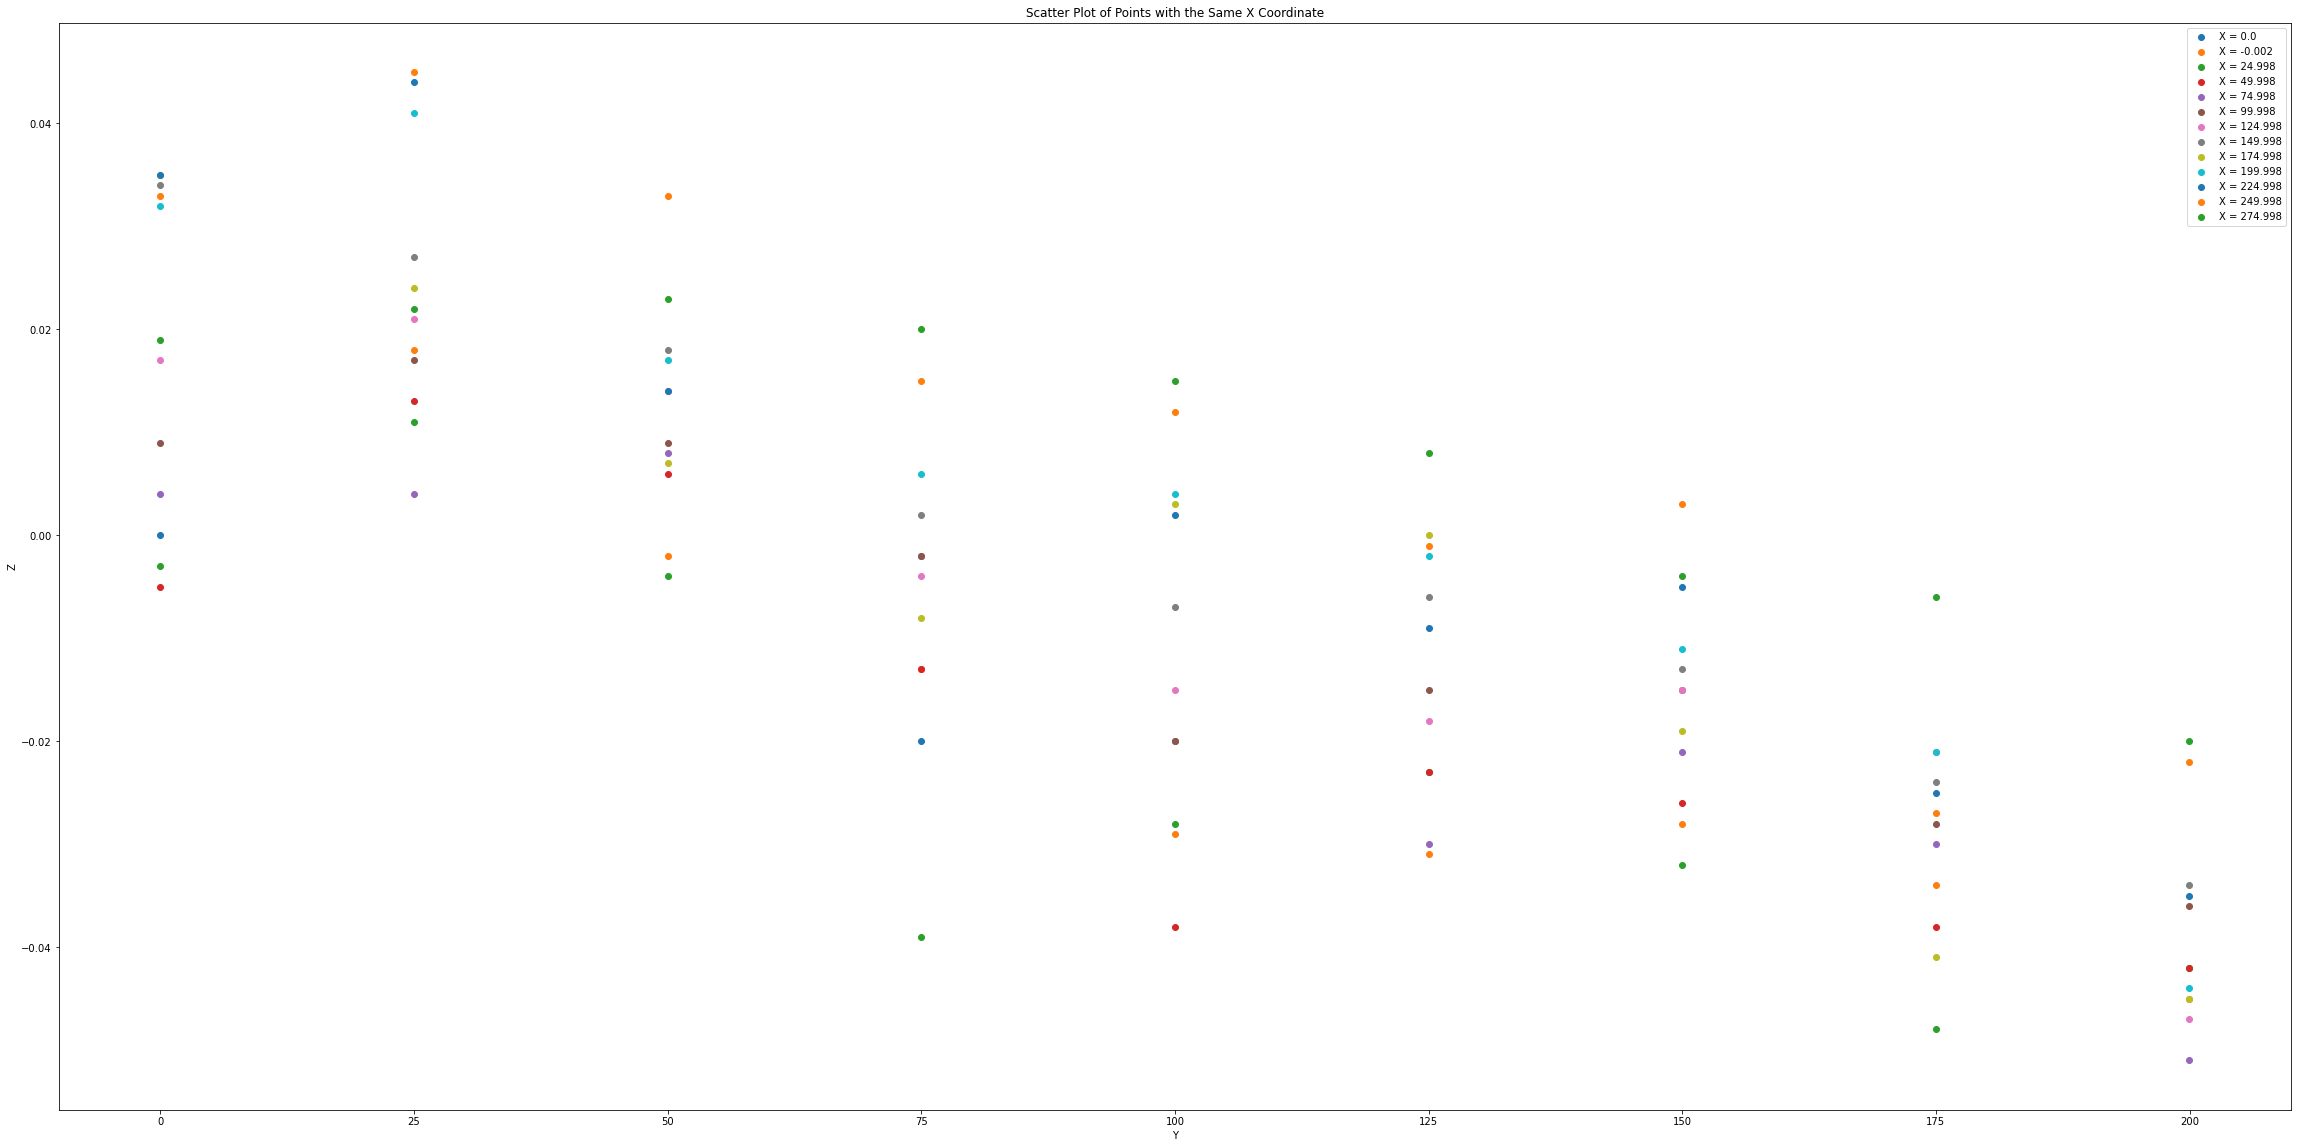

In [16]:
# Group the data by X coordinate
plt.figure(figsize=(40, 20))

grouped_data = {}
for point_id, coords in formatted_data:
    x_coord = coords['X']
    if x_coord not in grouped_data:
        grouped_data[x_coord] = []
    grouped_data[x_coord].append((point_id, coords['Y'], coords['Z']))

# Plot each group separately
for x, points in grouped_data.items():
    point_ids, ys, zs = zip(*points)
    plt.scatter(ys, zs, label=f'X = {x}')

# Add labels and legend
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Scatter Plot of Points with the Same X Coordinate')
plt.legend()
plt.show()

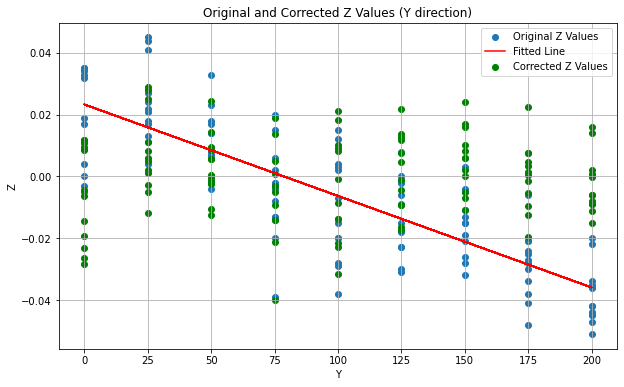

In [17]:
# Extract X, Y, and Z values from the data
x_values = []
y_values = []
z_values = []
for position, coords in formatted_data:
    x_values.append(coords['X'])
    y_values.append(coords['Y'])
    z_values.append(coords['Z'])

# Perform linear regression to fit a line to the data
slope_y, intercept_y = np.polyfit(y_values, z_values, 1)

# Calculate the fitted line
fitted_line_y = slope_y * np.array(y_values) + intercept_y

# Subtract the fitted line from the original Z values to correct for the slope in the Y direction
corrected_z_values_y = np.array(z_values) - fitted_line_y

# Plot the original and corrected Z values
plt.figure(figsize=(10, 6))
plt.scatter(y_values, z_values, label='Original Z Values')
plt.plot(y_values, fitted_line_y, color='red', label='Fitted Line')
plt.scatter(y_values, corrected_z_values_y, color='green', label='Corrected Z Values')
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Original and Corrected Z Values (Y direction)')
plt.legend()
plt.grid(True)
plt.show()

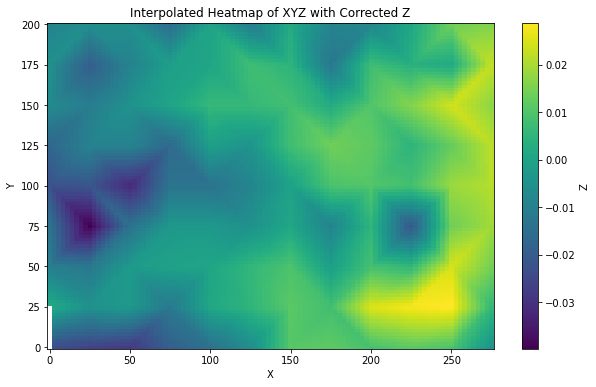

In [18]:
# Create a regular grid to interpolate onto
x_grid = np.linspace(min(x_values), max(x_values), 100)
y_grid = np.linspace(min(y_values), max(y_values), 100)
X, Y = np.meshgrid(x_grid, y_grid)

# Interpolate Z values onto the grid
Z = griddata((x_values, y_values), corrected_z_values_y, (X, Y), method='linear')

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(label='Z')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Interpolated Heatmap of XYZ with Corrected Z')
plt.show()

In [19]:
# Flatten the interpolated Z values
Z_flat = Z.flatten()

# Calculate the Root Mean Square (RMS) excluding NaN values
rms = np.sqrt(np.nanmean(Z_flat**2))

print("Root Mean Square (RMS) of the heatmap (excluding NaN points):", rms)

Root Mean Square (RMS) of the heatmap (excluding NaN points): 0.01205698687047486


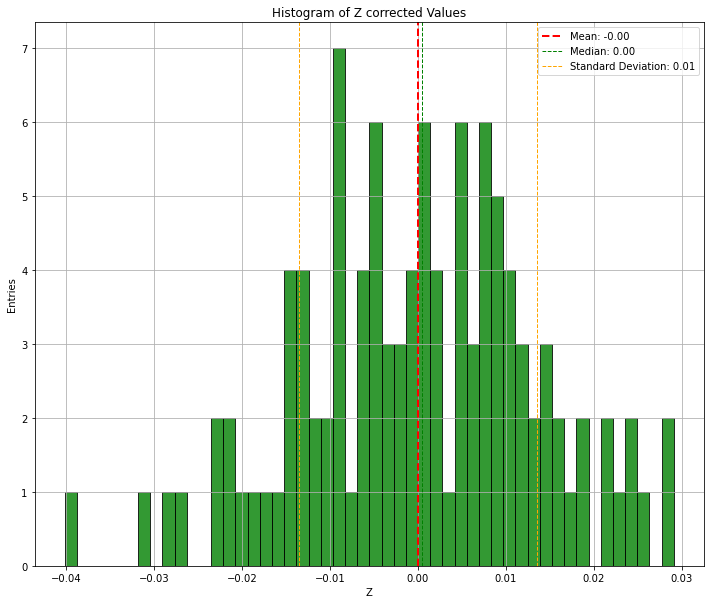

In [20]:
# Create the histogram
plt.figure(figsize=(12, 10))

plt.hist(corrected_z_values_y, bins=50, color='green', edgecolor='black', alpha=0.8)
# Add mean, median, and standard deviation lines
mean_value = np.mean(corrected_z_values_y)
median_value = np.median(corrected_z_values_y)
std_dev = np.std(corrected_z_values_y)

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.axvline(mean_value + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Standard Deviation: {std_dev:.2f}')
plt.axvline(mean_value - std_dev, color='orange', linestyle='dashed', linewidth=1)

plt.legend()
plt.xlabel('Z')
plt.ylabel('Entries')
plt.title('Histogram of Z corrected Values')
plt.grid(True)
plt.show()

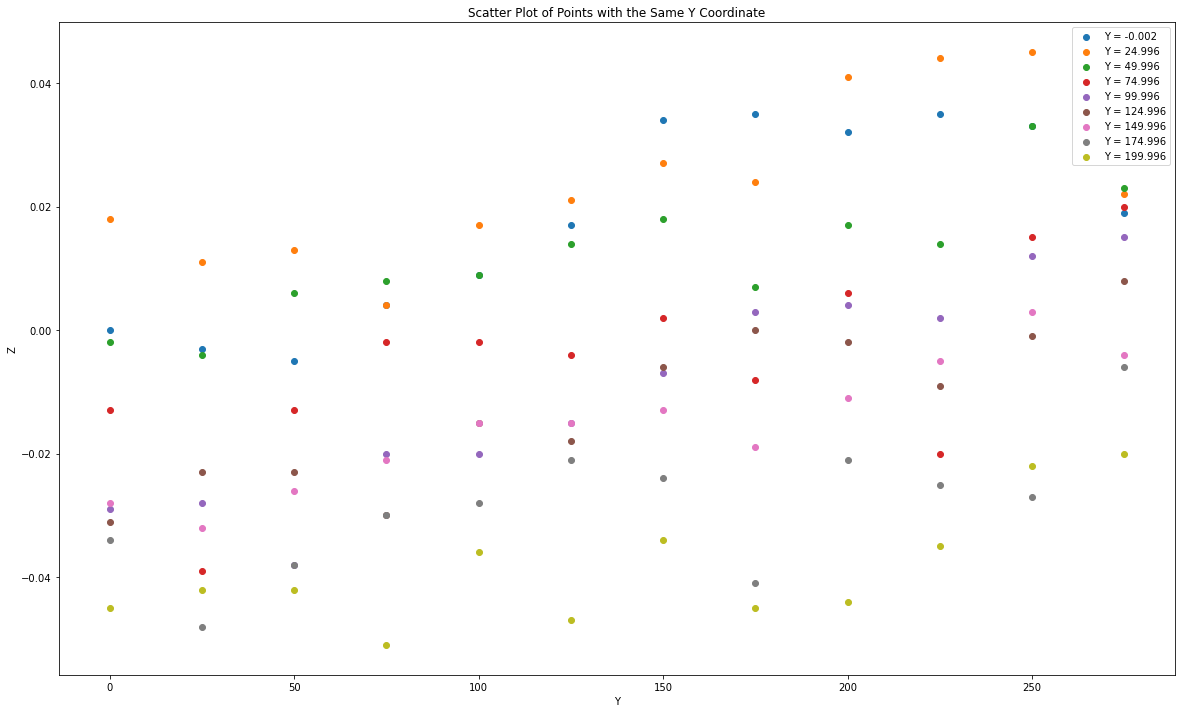

In [21]:
# Group the data by X coordinate
plt.figure(figsize=(20, 12))

grouped_data = {}
for point_id, coords in formatted_data:
    y_coord = coords['Y']
    if y_coord not in grouped_data:
        grouped_data[y_coord] = []
    grouped_data[y_coord].append((point_id, coords['X'], coords['Z']))

# Plot each group separately
for y, points in grouped_data.items():
    point_ids, xs, zs = zip(*points)
    plt.scatter(xs, zs, label=f'Y = {y}')

# Add labels and legend
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Scatter Plot of Points with the Same Y Coordinate')
plt.legend()
plt.show()

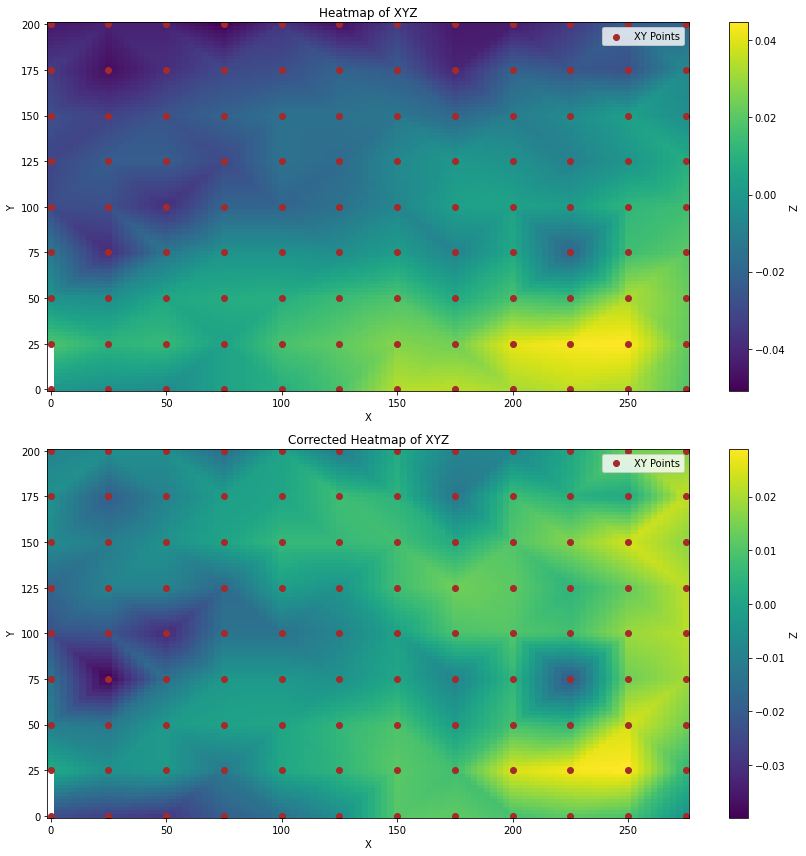

In [22]:
plt.figure(figsize=(12, 12))

Z = griddata((x_values, y_values), z_values, (X, Y), method='linear')

# Plot the heatmap
plt.subplot(2, 1, 1)
im = plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(im, label='Z')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap of XYZ')

# Overlay XY points on top of the heatmap
plt.scatter(x_values, y_values, color='brown', marker='o', label='XY Points')
plt.legend()

Z = griddata((x_values, y_values), corrected_z_values_y, (X, Y), method='linear')

# Plot the scatter plot
plt.subplot(2, 1, 2)
sc = plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(sc, label='Z')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Corrected Heatmap of XYZ')
# Overlay XY points on top of the heatmap
plt.scatter(x_values, y_values, color='brown', marker='o', label='XY Points')
plt.legend()


plt.tight_layout()
plt.show()

In [23]:
## Fitting a plane to a set of 3D points is a common technique used in planarity analysis. This technique is often employed in various fields such as computer vision, robotics, geomatics, and manufacturing to assess the flatness or planarity of a surface.

#The fitting of a plane involves finding the best-fitting plane that minimizes the sum of squared distances between the plane and the data points. This can be achieved using mathematical techniques such as least squares regression or principal component analysis (PCA).

#Once the plane is fitted to the data, various metrics can be calculated to assess the planarity, such as the root mean square (RMS) of the distances between the data points and the fitted plane, or the deviation of the data points from the plane.

#Overall, fitting a plane to the data provides a quantitative measure of planarity and can be a useful tool for quality control, surface inspection, and geometric analysis.


In [24]:
#The goal is to find the values of a and b that minimize the sum of the squared residuals. This is why it's called "least squares" regression.

In [25]:
def fit_plane(formatted_data):   
    # Extract X, Y, and Z coordinates from the formatted data 
    X = np.array([coords['X'] for _, coords in formatted_data])
    Y = np.array([coords['Y'] for _, coords in formatted_data])
    Z = np.array([coords['Z'] for _, coords in formatted_data])
    
    # Construct the design matrix contains the independent variables
    A = np.vstack((X, Y, np.ones_like(X))).T #stacking X, Y, and a column of ones (for the intercept term) vertically and transposing it. 
    #This design matrix is used in the least squares regression.
    
    # Perform least squares regression to find the plane parameters
    #params, _, _, _ = np.linalg.lstsq(A, Z, rcond=None) 
    params, residuals, rank, singular_values = np.linalg.lstsq(A, Z, rcond=None)

    #contains the coefficients of the plane equation (a, b, c) that minimize the sum of squared residuals.
    #assigned to _ to indicate that they're being ignored.
    
    # Extract plane parameters (coefficients of the plane equation: ax + by + c = z)
    a, b, c = params
    residuals = residuals  #the residual sum of squares, which represents the sum of squared differences between the observed and predicted values of Z
    singular_values = singular_values # the singular values of A
    return a, b, c, residuals, singular_values

a, b, c, residuals, singular_values = fit_plane(formatted_data)
print("Plane parameters: a =", a, ", b =", b, ", c =", c, ", residuals = ", residuals, ", singular values = ", singular_values)


Plane parameters: a = 0.00011634811792802713 , b = -0.0002962240605784651 , c = 0.00731809576015499 , residuals =  [0.00877969] , singular values =  [1952.53057994  750.87838539    4.26459216]


In [26]:
# Visualize the fitted plane and original points
def visualize_plane_and_points(formatted_data, a, b, c, residuals, singular_values):
    X = np.array([coords['X'] for _, coords in formatted_data])
    Y = np.array([coords['Y'] for _, coords in formatted_data])
    Z = np.array([coords['Z'] for _, coords in formatted_data])
    
    # Create a meshgrid for X and Y coordinates
    X_grid, Y_grid = np.meshgrid(np.linspace(min(X), max(X), 10), np.linspace(min(Y), max(Y), 10))
    
    # Calculate Z values for the fitted plane
    Z_plane = a * X_grid + b * Y_grid + c

    # Plot the points
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X, Y, Z, color='b', label='Original Points')
    
    # Plot the fitted plane
    ax.plot_surface(X_grid, Y_grid, Z_plane, alpha=0.5, color='r', label='Fitted Plane')
    
    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Fitted Plane and Original Points')
    
    # Add legend
    ax.legend()
    
    # Show plot
    plt.show()

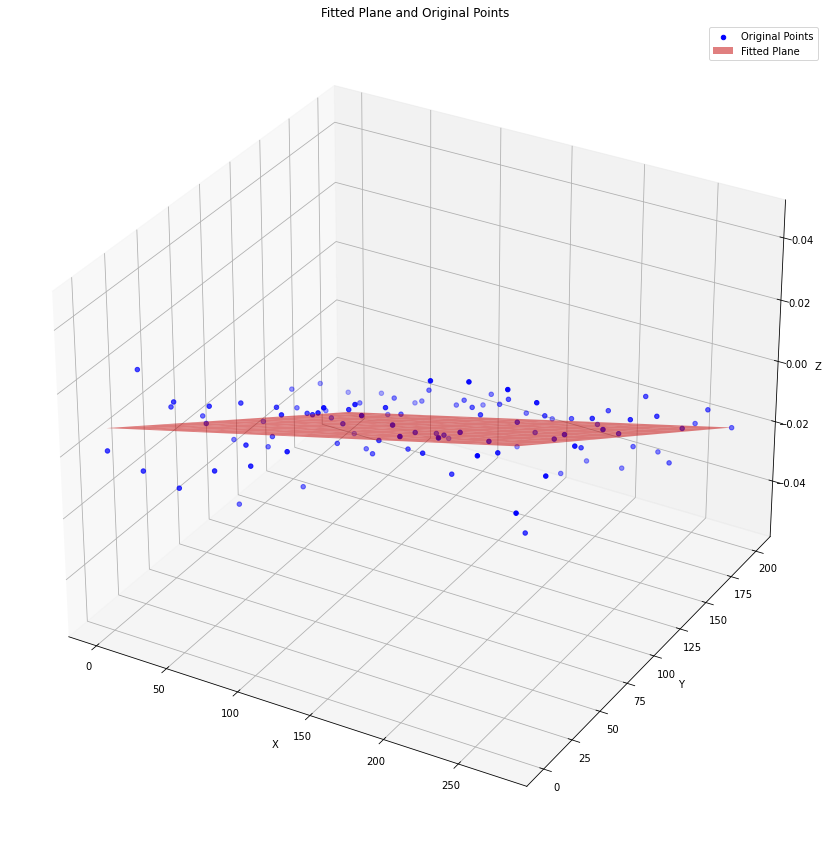

In [27]:
#a, b, c = fit_plane(formatted_data)
a, b, c, residuals, singular_values = fit_plane(formatted_data)
#visualize_plane_and_points(formatted_data, a, b, c)
visualize_plane_and_points(formatted_data, a, b, c, residuals, singular_values)

In [28]:
def calculate_planarity_metrics(formatted_data, a, b, c):
    # Extract X, Y, and Z coordinates from the formatted data
    X = np.array([coords['X'] for _, coords in formatted_data])
    Y = np.array([coords['Y'] for _, coords in formatted_data])
    Z = np.array([coords['Z'] for _, coords in formatted_data])
    
    # Calculate distances from points to the fitted plane
    distances = np.abs(a * X + b * Y - Z + c) / np.sqrt(a**2 + b**2 + 1)
    
    # Calculate RMS of the distances
    rms_distance = np.sqrt(np.mean(distances**2))
    
    # Calculate deviation of the points from the plane
    deviation = distances.mean()
    
    return rms_distance, deviation

In [29]:
rms_distance, deviation = calculate_planarity_metrics(formatted_data, a, b, c)
print("RMS Distance:", rms_distance) #the root mean square (RMS) of the distances between the data points and the fitted plane
print("Deviation:", deviation) #the deviation of the data points from the plane


RMS Distance: 0.009016285056164456
Deviation: 0.007039991921823085


In [30]:
##It calculates the distances from each point to the fitted plane, then computes the RMS of these distances and the deviation of the points from the plane.

TypeError: 'NoneType' object is not subscriptable

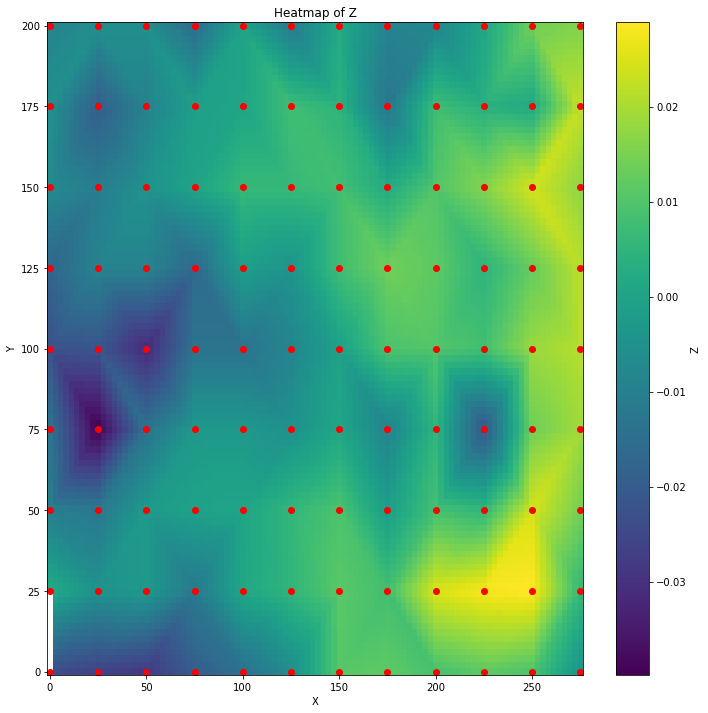

In [31]:
# Define the point IDs
point_4_4_id = '4,4'
point_4_13_id = '4,13'
point_13_4_id = '13,4'
point_13_13_id = '13,13'


# Find the XY coordinates corresponding to the specified point IDs
point_4_4_xy = None
point_4_13_xy = None
point_13_4_xy = None
point_13_13_xy = None

for point_id, coords in formatted_data:
    if point_id == point_4_4_id:
        point_4_4_xy = (coords['X'], coords['Y'])
    elif point_id == point_4_13_id:
        point_4_13_xy = (coords['X'], coords['Y'])
    elif point_id == point_13_4_id:
        point_13_4_xy = (coords['X'], coords['Y'])
    elif point_id == point_13_13_id:
        point_13_13_xy = (coords['X'], coords['Y'])

# Plot the heatmap of Z
plt.figure(figsize=(12, 12))
plt.pcolormesh(X, Y, Z, cmap='viridis')
plt.colorbar(label='Z')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap of Z')

# Overlay XY points on top of the heatmap
plt.scatter(x_values, y_values, color='red', marker='o', label='XY Points')

# Connect specified points with lines
plt.plot([point_4_13_xy[0], point_13_13_xy[0]], [point_4_13_xy[1], point_13_13_xy[1]], color='blue', linestyle='-', linewidth=2)
plt.plot([point_13_4_xy[0], point_13_13_xy[0]], [point_13_4_xy[1], point_13_13_xy[1]], color='blue', linestyle='-', linewidth=2) #perpendicular
plt.plot([point_4_4_xy[0], point_4_13_xy[0]], [point_4_4_xy[1], point_4_13_xy[1]], color='blue', linestyle='-', linewidth=2) #perpendicular
plt.plot([point_4_4_xy[0], point_13_4_xy[0]], [point_4_4_xy[1], point_13_4_xy[1]], color='blue', linestyle='-', linewidth=2) #perpendicular

plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
X_test = np.column_stack((x_values, y_values, np.ones_like(x_values)))

# Fit linear regression model
model = LinearRegression().fit(X_test, z_values)

# Get the coefficients (normal vector) of the plane
normal_vector = model.coef_
intercept = model.intercept_

# Generate points on the plane for visualization
x_plane = np.linspace(min(x_values), max(x_values), 10)
y_plane = np.linspace(min(y_values), max(y_values), 10)
x_plane, y_plane = np.meshgrid(x_plane, y_plane)
z_plane = normal_vector[0] * x_plane + normal_vector[1] * y_plane + intercept

# Plot the original data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_values, y_values, z_values, c='b', marker='o', label='Data Points')

# Plot the plane
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Plane Fitting')

plt.legend()
plt.show()


# Summary on PCB thickness 

In [1]:
import ROOT

Welcome to JupyROOT 6.30/04


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


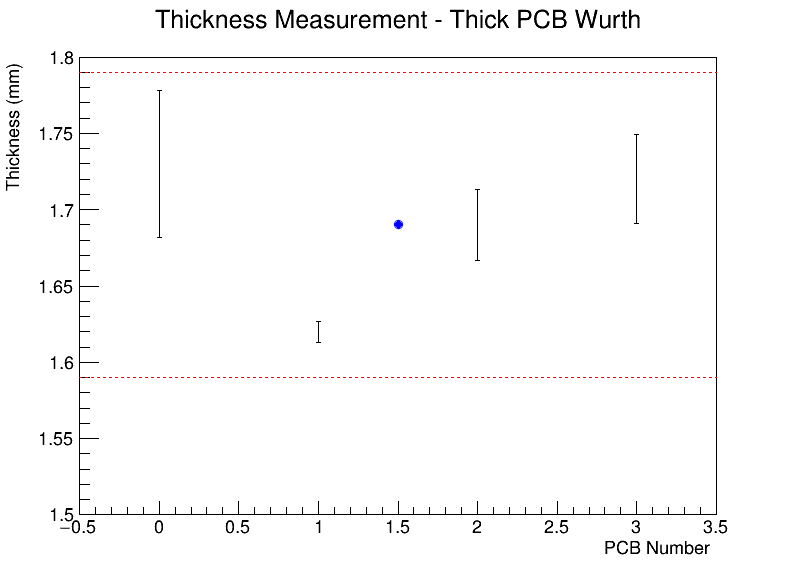

In [18]:
# Define the thickness values and their uncertainties
thickness_values = [1.73, 1.62, 1.69, 1.72]
thickness_errors = [0.048, 0.007, 0.023, 0.029]

# Calculate the mean thickness and its uncertainty
mean_thickness = sum(thickness_values) / len(thickness_values)
mean_error = 0.1

# Create a TGraphErrors object to hold the data
graph = ROOT.TGraphErrors(len(thickness_values))

# Set the data points with their errors
for i in range(len(thickness_values)):
    graph.SetPoint(i, i, thickness_values[i])
    graph.SetPointError(i, 0, thickness_errors[i])

# Create a canvas to draw the graph
canvas = ROOT.TCanvas("canvas", "Error Graph", 800, 600)

# Draw the graph
graph.Draw("AP")
graph.SetTitle("Thickness Measurement - Thick PCB Wurth")
graph.GetXaxis().SetTitle("PCB Number")
graph.GetYaxis().SetTitle("Thickness (mm)")

# Draw the upper and lower lines of the band
upper_line = ROOT.TLine(-0.5, mean_thickness + 0.1, len(thickness_values) - 0.5, mean_thickness + 0.1)
lower_line = ROOT.TLine(-0.5, mean_thickness - 0.1, len(thickness_values) - 0.5, mean_thickness - 0.1)
upper_line.SetLineColor(ROOT.kRed)
lower_line.SetLineColor(ROOT.kRed)
upper_line.SetLineStyle(2)  # Dashed style
lower_line.SetLineStyle(2)  # Dashed style
upper_line.Draw("same")
lower_line.Draw("same")

# Show the canvas
canvas.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


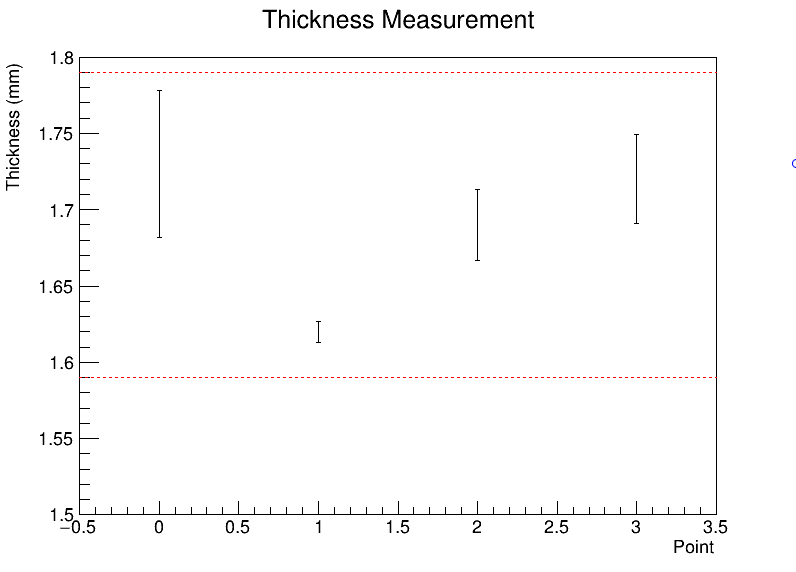

In [25]:
# Define the thickness values and their uncertainties
thickness_values = [1.73, 1.62, 1.69, 1.72]
thickness_errors = [0.048, 0.007, 0.023, 0.029]

# Calculate the mean thickness and its uncertainty
mean_thickness = sum(thickness_values) / len(thickness_values)
mean_error = sum(thickness_errors) / len(thickness_errors)

# Create a TGraphErrors object to hold the data
graph = ROOT.TGraphErrors(len(thickness_values))

# Set the data points with their errors
for i in range(len(thickness_values)):
    graph.SetPoint(i, i, thickness_values[i])
    graph.SetPointError(i, 0, thickness_errors[i])

# Create a canvas to draw the graph
canvas = ROOT.TCanvas("canvas", "Error Graph", 800, 600)

# Draw the graph
graph.Draw("AP")
graph.SetTitle("Thickness Measurement")
graph.GetXaxis().SetTitle("Point")
graph.GetYaxis().SetTitle("Thickness (mm)")

# Draw markers at the mean thickness value
marker = ROOT.TMarker(len(thickness_values) / 2 - 0.5, mean_thickness, 20)
marker.SetMarkerSize(1.2)
marker.SetMarkerColor(ROOT.kBlue)
marker.Draw("same")


# Draw the upper and lower lines of the band
upper_line = ROOT.TLine(-0.5, mean_thickness + 0.1, len(thickness_values) - 0.5, mean_thickness + 0.1)
lower_line = ROOT.TLine(-0.5, mean_thickness - 0.1, len(thickness_values) - 0.5, mean_thickness - 0.1)
upper_line.SetLineColor(ROOT.kRed)
lower_line.SetLineColor(ROOT.kRed)
upper_line.SetLineStyle(2)  # Dashed style
lower_line.SetLineStyle(2)  # Dashed style
upper_line.Draw("same")
lower_line.Draw("same")


# Set custom limits on the X and Y axes
graph.GetXaxis().SetLimits(-0.5, len(thickness_values) - 0.5)  # Custom X-axis limits
graph.GetYaxis().SetRangeUser(1.5, 1.8)  # Custom Y-axis limits

# Show the canvas
canvas.Draw()


1.69


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


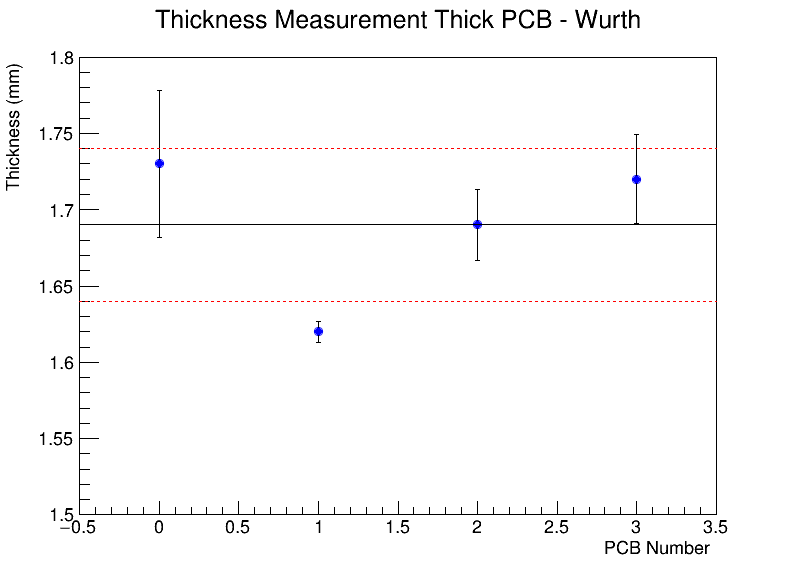

In [3]:
# Define the thickness values and their uncertainties
thickness_values = [1.73, 1.62, 1.69, 1.72]
thickness_errors = [0.048, 0.007, 0.023, 0.029]

# Create a TGraphErrors object to hold the data
graph = ROOT.TGraphErrors(len(thickness_values))

# Set the data points and their errors
for i in range(len(thickness_values)):
    graph.SetPoint(i, i, thickness_values[i])
    graph.SetPointError(i, 0, thickness_errors[i])


# Calculate the mean thickness and its uncertainty
mean_thickness = sum(thickness_values) / len(thickness_values)
print(mean_thickness)
mean_error = 0.1
    
# Create a canvas to draw the graph
canvas = ROOT.TCanvas("canvas", "Thickness Points", 800, 600)

# Draw the graph with markers and error bars
graph.SetMarkerStyle(20)
graph.SetMarkerSize(1.2)
graph.SetMarkerColor(ROOT.kBlue)
graph.Draw("AP")

# Set titles and labels
graph.SetTitle("Thickness Measurement Thick PCB - Wurth")
graph.GetXaxis().SetTitle("PCB Number")
graph.GetYaxis().SetTitle("Thickness (mm)")

# Draw the upper and lower lines of the band
upper_line = ROOT.TLine(-0.5, mean_thickness + 0.05, len(thickness_values) - 0.5, mean_thickness + 0.05)
lower_line = ROOT.TLine(-0.5, mean_thickness - 0.05, len(thickness_values) - 0.5, mean_thickness - 0.05)
upper_line.SetLineColor(ROOT.kRed)
lower_line.SetLineColor(ROOT.kRed)
upper_line.SetLineStyle(2)  # Dashed style
lower_line.SetLineStyle(2)  # Dashed style
upper_line.Draw("same")
lower_line.Draw("same")

# Draw the mean value as a straight line
mean_line = ROOT.TLine(-0.5, mean_thickness, len(thickness_values) - 0.5, mean_thickness)
mean_line.SetLineColor(ROOT.kBlack)
mean_line.SetLineStyle(1)  # Solid style
mean_line.Draw("same")

# Set custom limits on the X and Y axes
graph.GetXaxis().SetLimits(-0.5, len(thickness_values) - 0.5)  # Custom X-axis limits
graph.GetYaxis().SetRangeUser(1.5, 1.8)  # Custom Y-axis limits
# Show the canvas
canvas.Draw()


0.8150000000000001


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


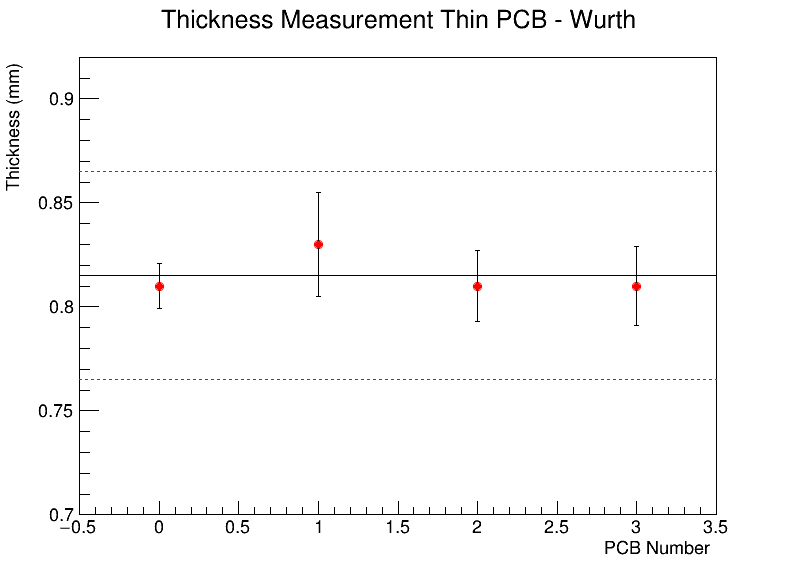

In [2]:
import ROOT

# Define the thickness values and their uncertainties for the second set of points
thickness_values2 = [0.81, 0.83, 0.81, 0.81]
thickness_errors2 = [0.011, 0.025, 0.017, 0.019]

# Create a TGraphErrors object to hold the data for the second set of points
graph2 = ROOT.TGraphErrors(len(thickness_values2))

# Set the data points and their errors for the second set of points
for i in range(len(thickness_values2)):
    graph2.SetPoint(i, i, thickness_values2[i])
    graph2.SetPointError(i, 0, thickness_errors2[i])

# Calculate the mean thickness for the second set of points
mean_thickness2 = sum(thickness_values2) / len(thickness_values2)
print(mean_thickness2)

# Create a canvas to draw the graph
canvas = ROOT.TCanvas("canvas", "Thickness Points", 800, 600)

# Draw the graph with markers and error bars for the second set of points
graph2.SetMarkerStyle(20)
graph2.SetMarkerSize(1.2)
graph2.SetMarkerColor(ROOT.kRed)
graph2.Draw("AP")

# Set titles and labels
graph2.SetTitle("Thickness Measurement Thin PCB - Wurth")
graph2.GetXaxis().SetTitle("PCB Number")
graph2.GetYaxis().SetTitle("Thickness (mm)")

# Draw the upper and lower lines of the band for the second set of points
upper_line2 = ROOT.TLine(-0.5, mean_thickness2 + 0.05, len(thickness_values2) - 0.5, mean_thickness2 + 0.05)
lower_line2 = ROOT.TLine(-0.5, mean_thickness2 - 0.05, len(thickness_values2) - 0.5, mean_thickness2 - 0.05)
upper_line2.SetLineColor(ROOT.kRed)
lower_line2.SetLineColor(ROOT.kRed)
upper_line2.SetLineStyle(2)  # Dashed style
lower_line2.SetLineStyle(2)  # Dashed style
upper_line2.Draw("same")
lower_line2.Draw("same")

# Draw the mean value as a straight line
mean_line = ROOT.TLine(-0.5, mean_thickness2, len(thickness_values2) - 0.5, mean_thickness2)
mean_line.SetLineColor(ROOT.kBlack)
mean_line.SetLineStyle(1)  # Solid style
mean_line.Draw("same")

# Set custom limits on the X and Y axes
graph2.GetXaxis().SetLimits(-0.5, len(thickness_values2) - 0.5)  # Custom X-axis limits
graph2.GetYaxis().SetRangeUser(0.7, 0.92)  # Custom Y-axis limits

# Show the canvas
canvas.Draw()